In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from scipy.stats import *

# Read Source Files

In [3]:
df_train=pd.read_csv("C:/Users/praka/my_personal_project/flood_prediction/data/train.csv (1).zip", compression = 'zip')
df_test=pd.read_csv("C:/Users/praka/my_personal_project/flood_prediction/data/test.csv.zip",compression = 'zip')
#
print("Train:",len(df_train))
sample_sub=pd.read_csv("C:/Users/praka/my_personal_project/flood_prediction/data/sample_submission.csv.zip", compression = 'zip')
#
df_train.head()

Train: 1117957


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


# Exploratory Data Analysis

### Concise summary of the data

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

### Statistical summary

In [5]:
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


### Plot Functions

In [6]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()

        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        # Box plot
        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()
        
def get_count_plot(cat):
    ax=sns.countplot(x=df_train[cat],
                   order=df_train[cat].value_counts(ascending=False).index);
        
    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of "+cat+" Values",fontsize=16)

### Plot Target Values

<Figure size 2500x1200 with 0 Axes>

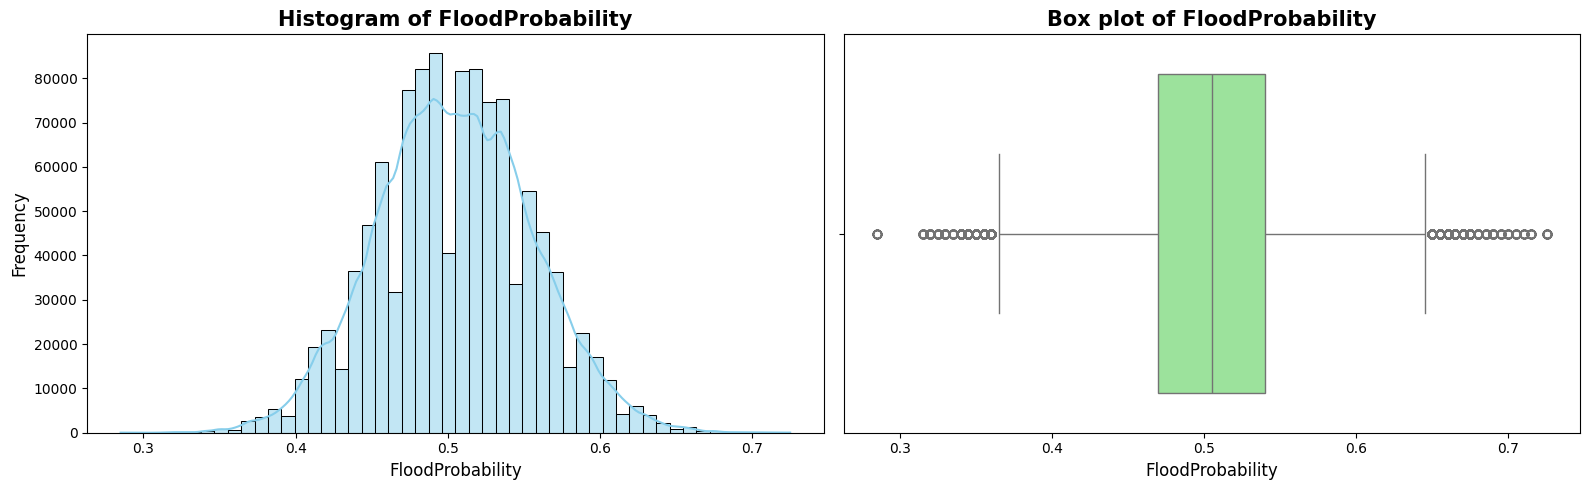

In [7]:
plt.figure(figsize=(25, 12))
plot_numerics(df_train[['FloodProbability']])

### Plot Numeric Values

In [8]:
num_cols=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

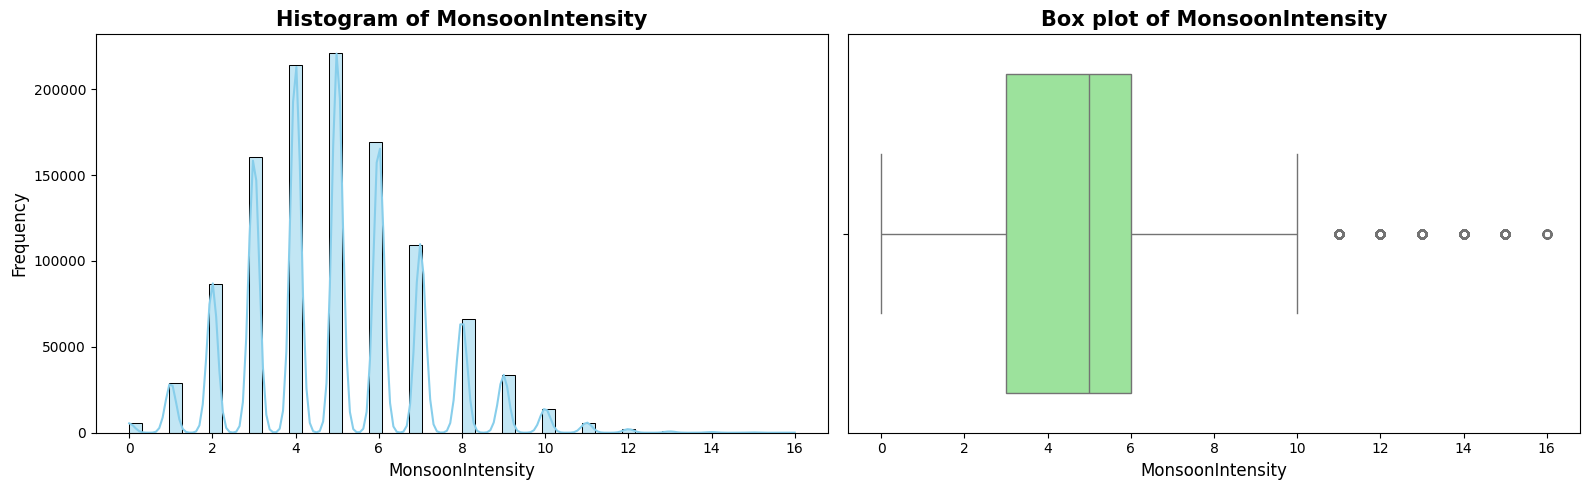

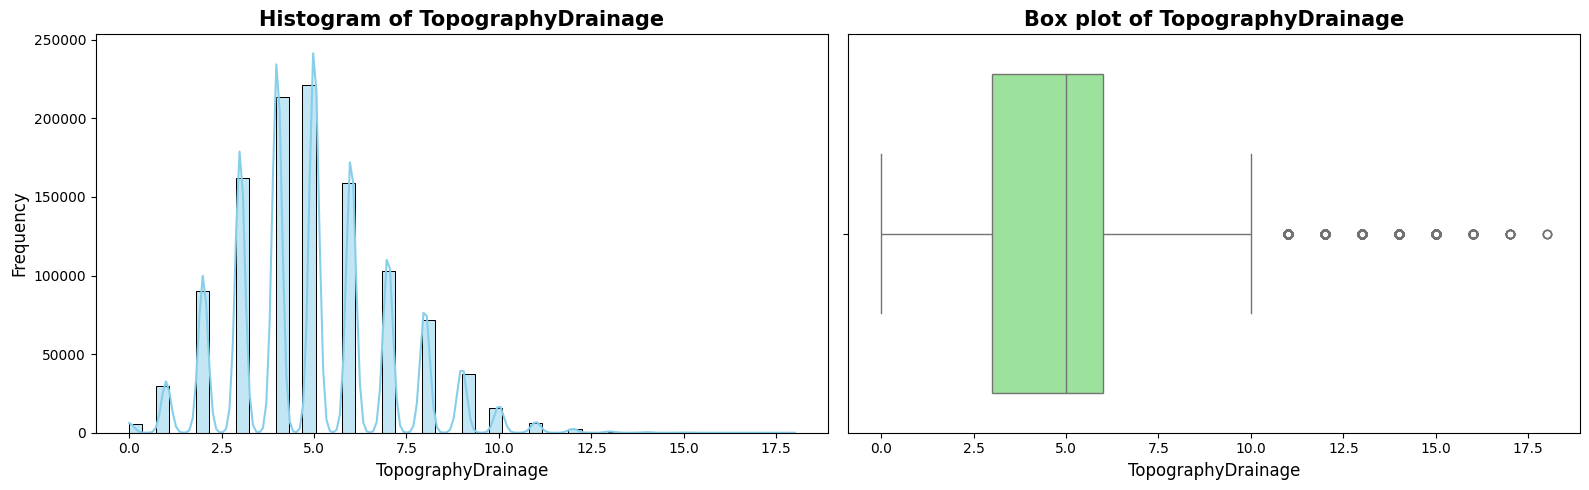

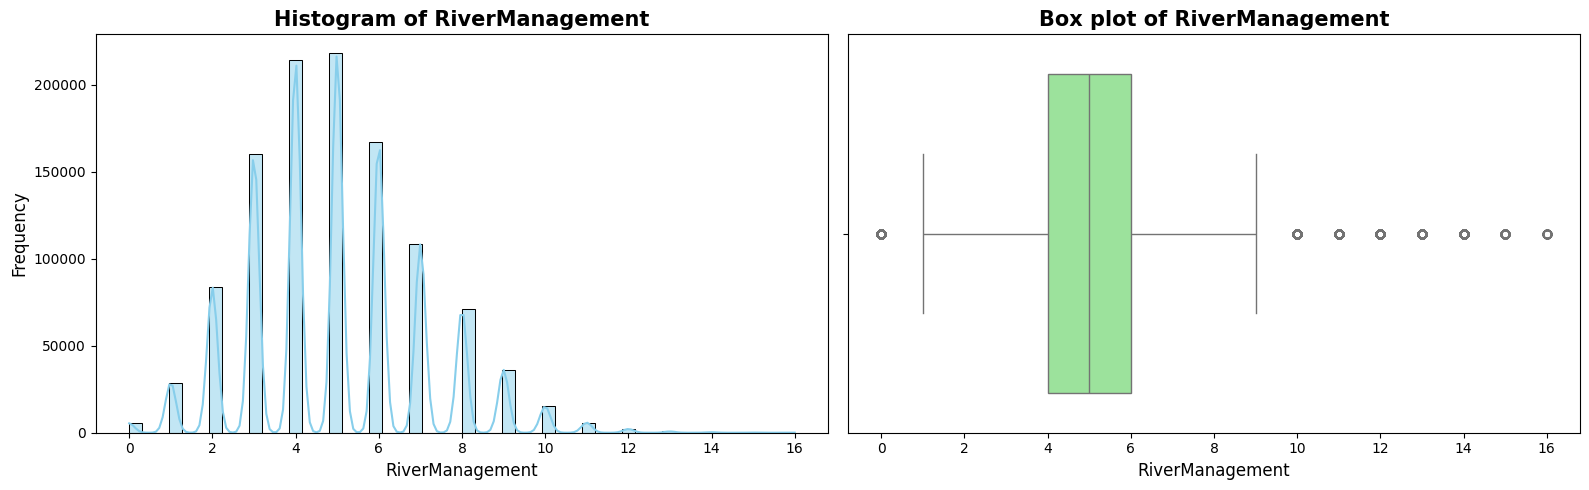

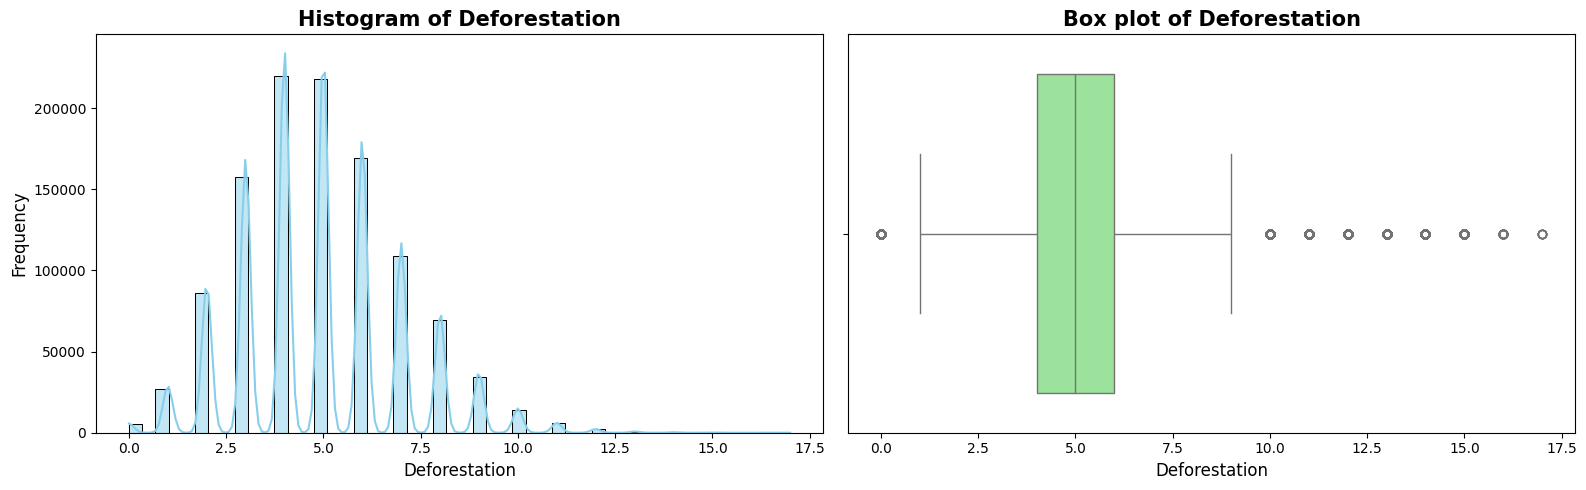

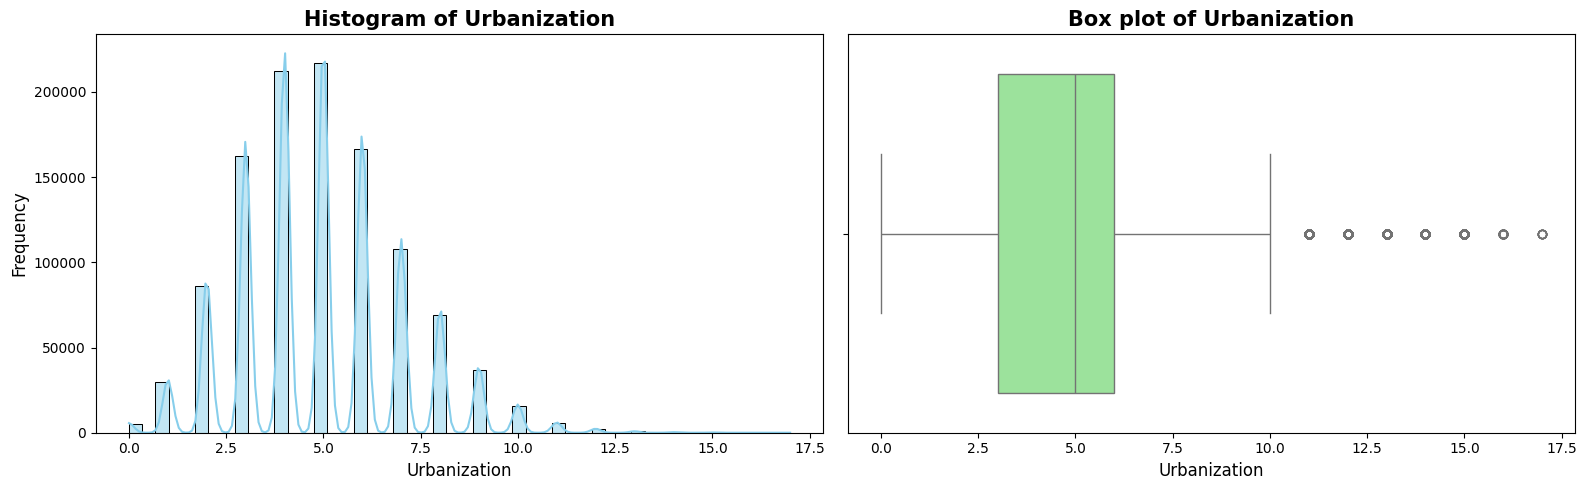

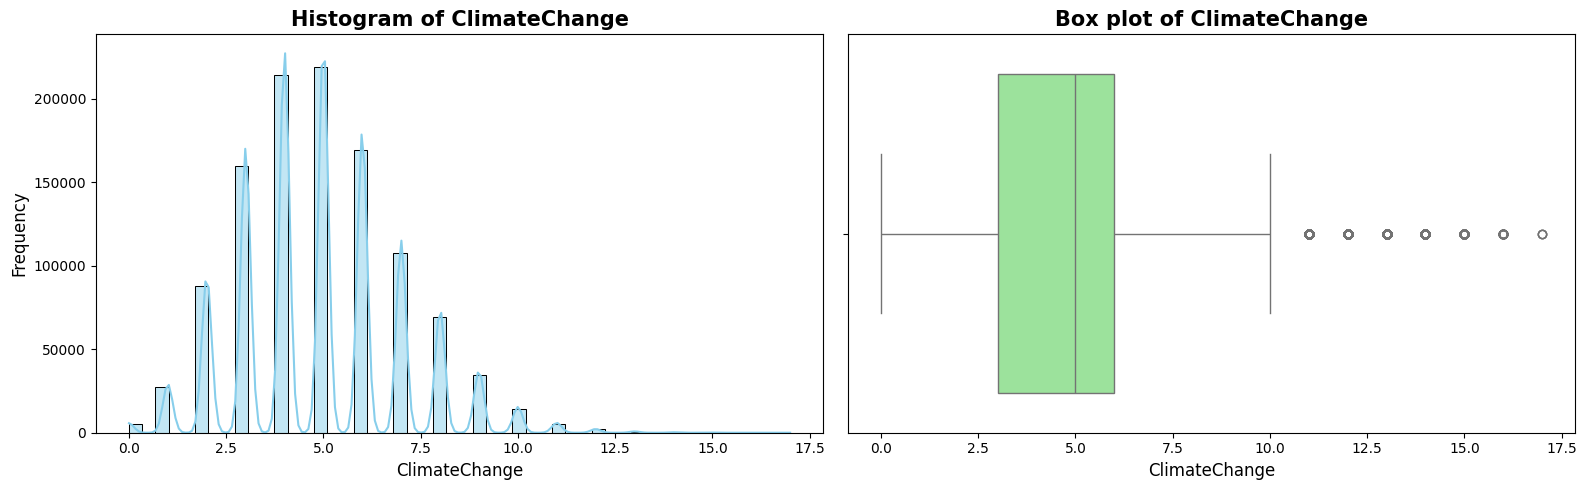

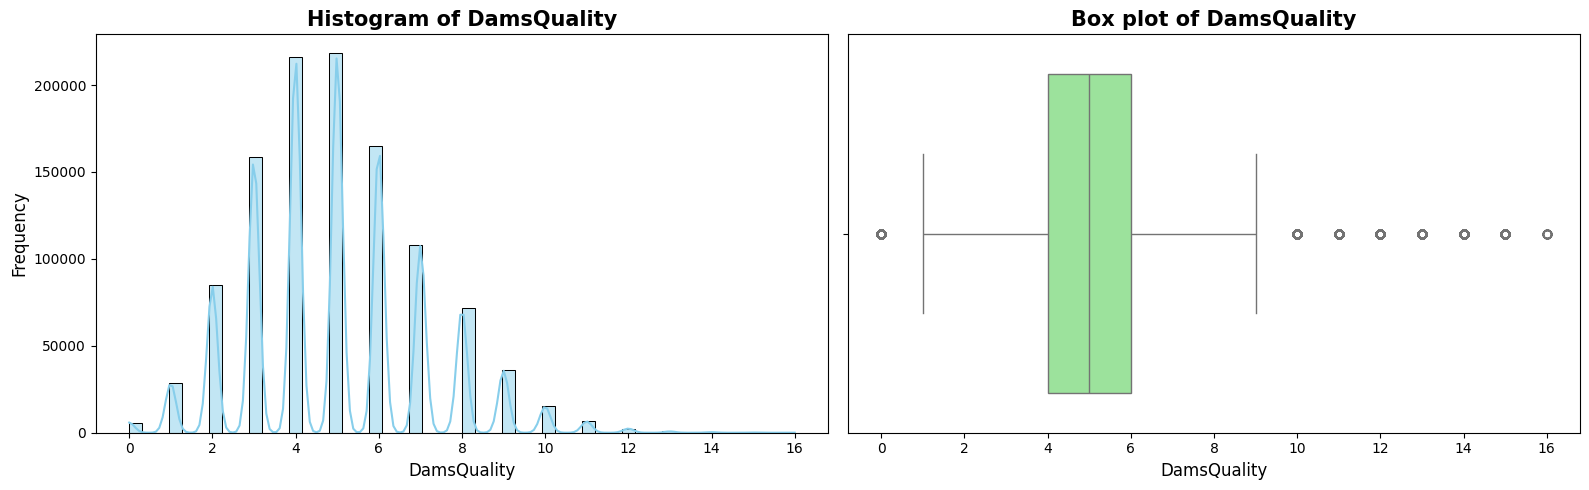

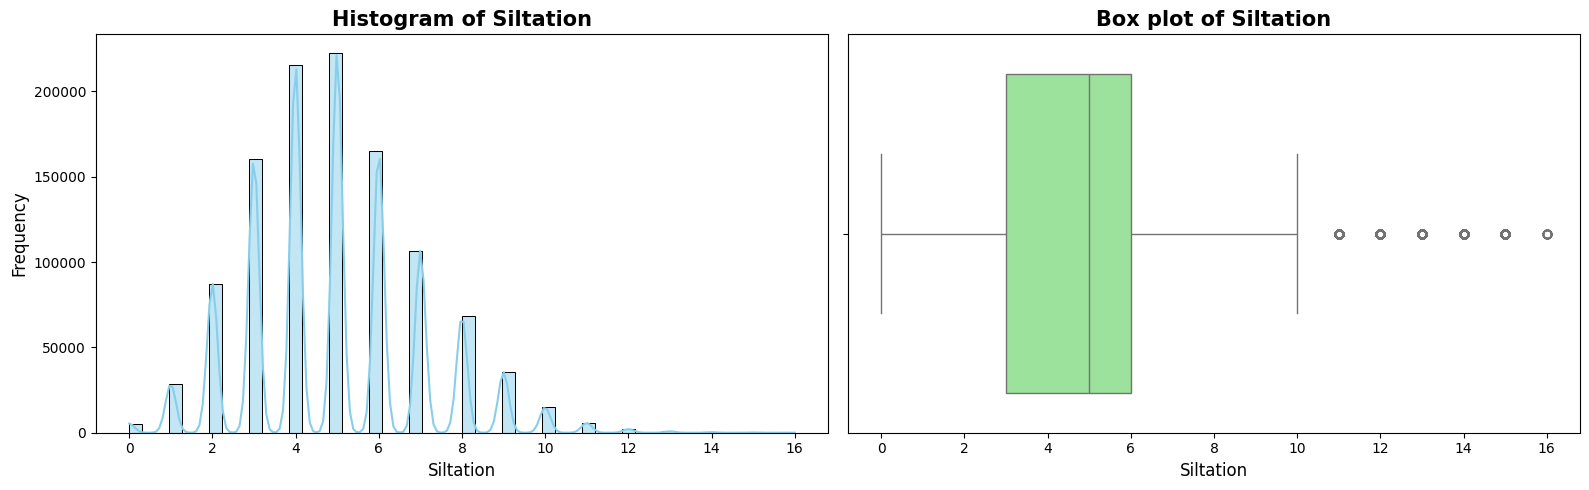

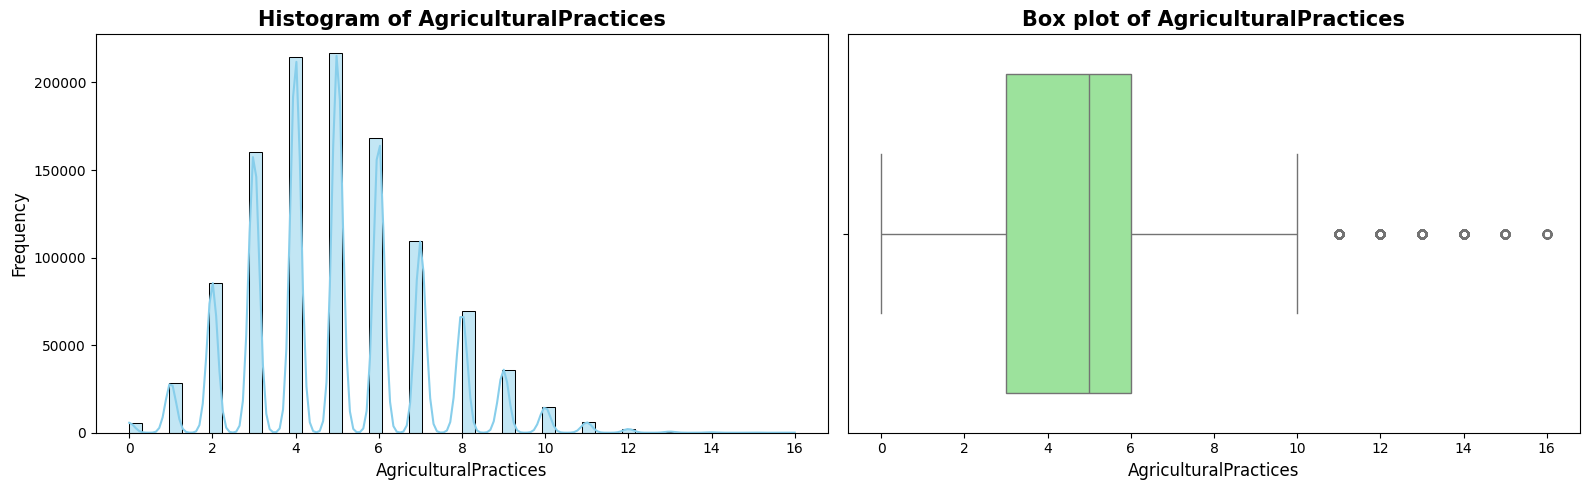

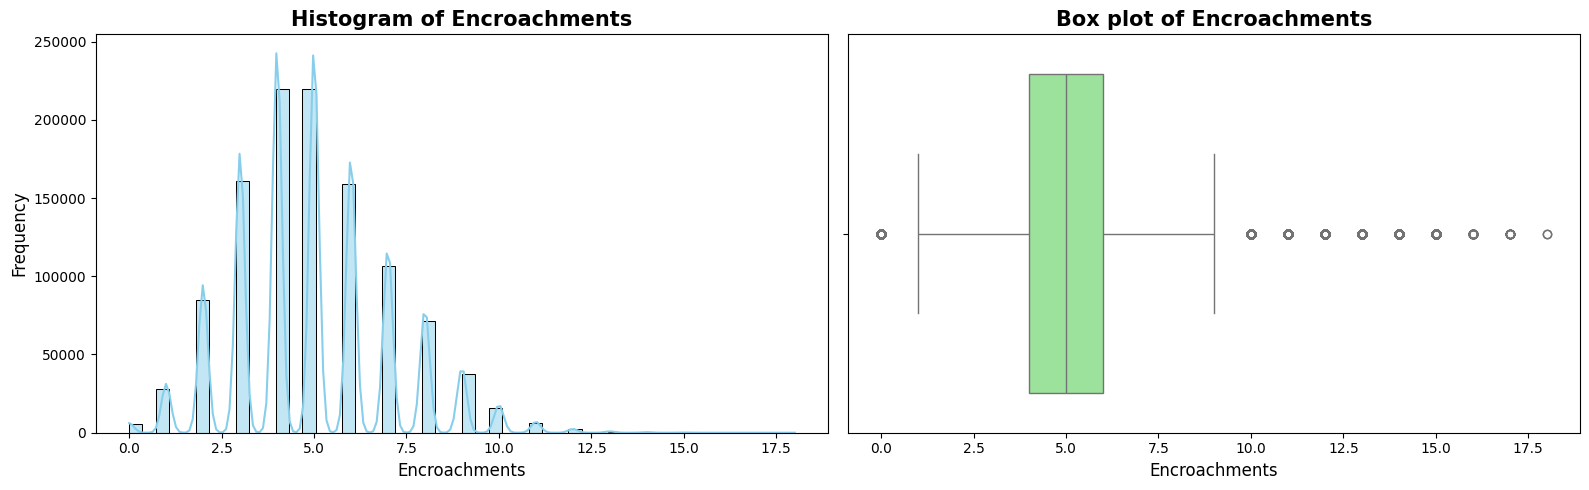

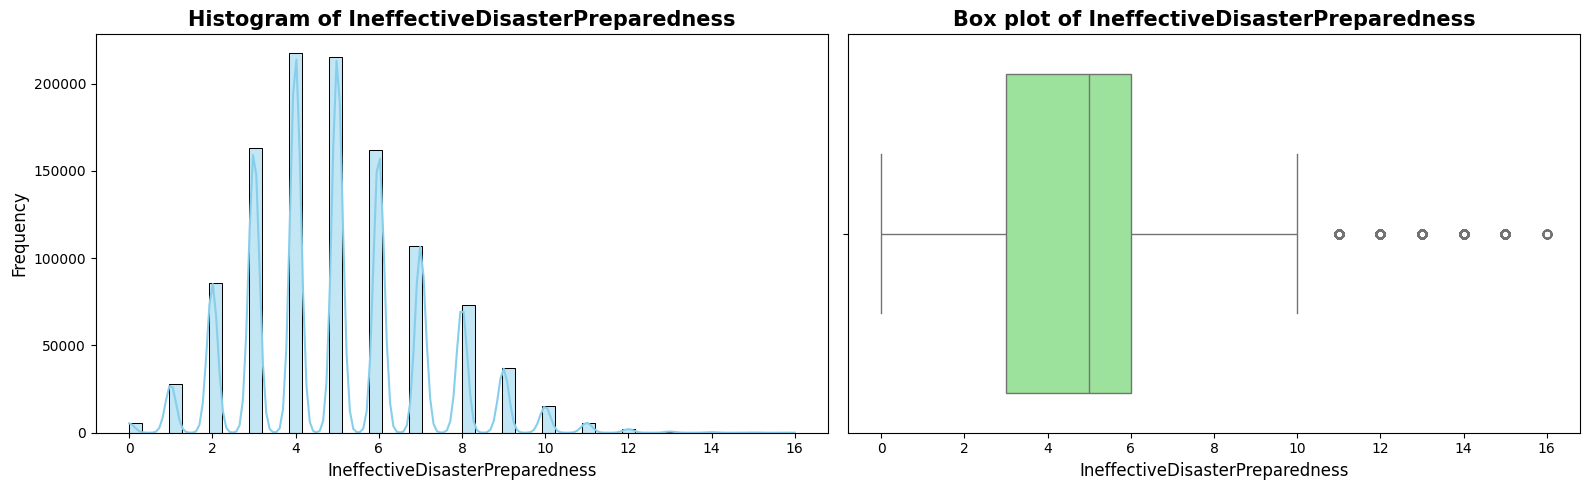

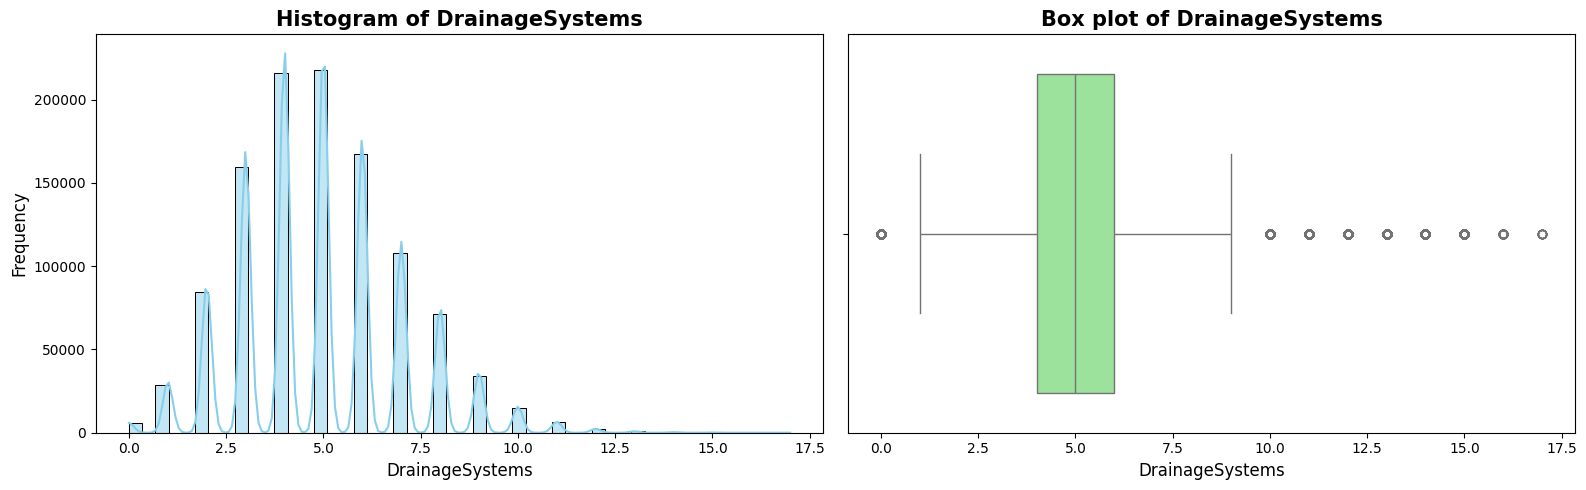

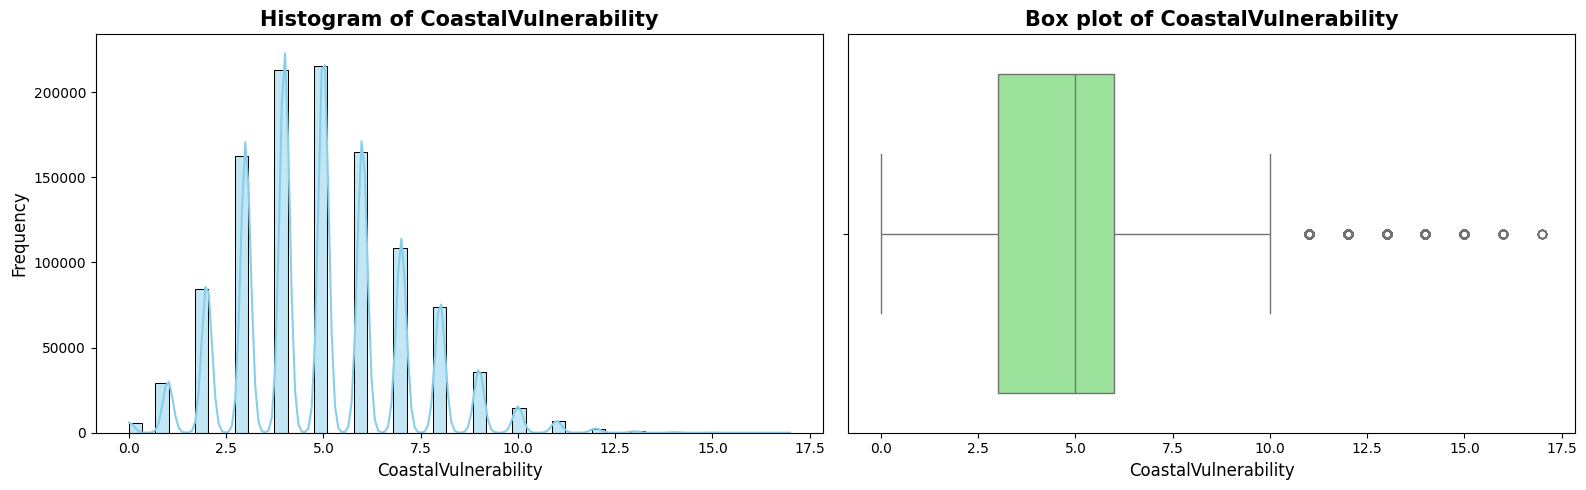

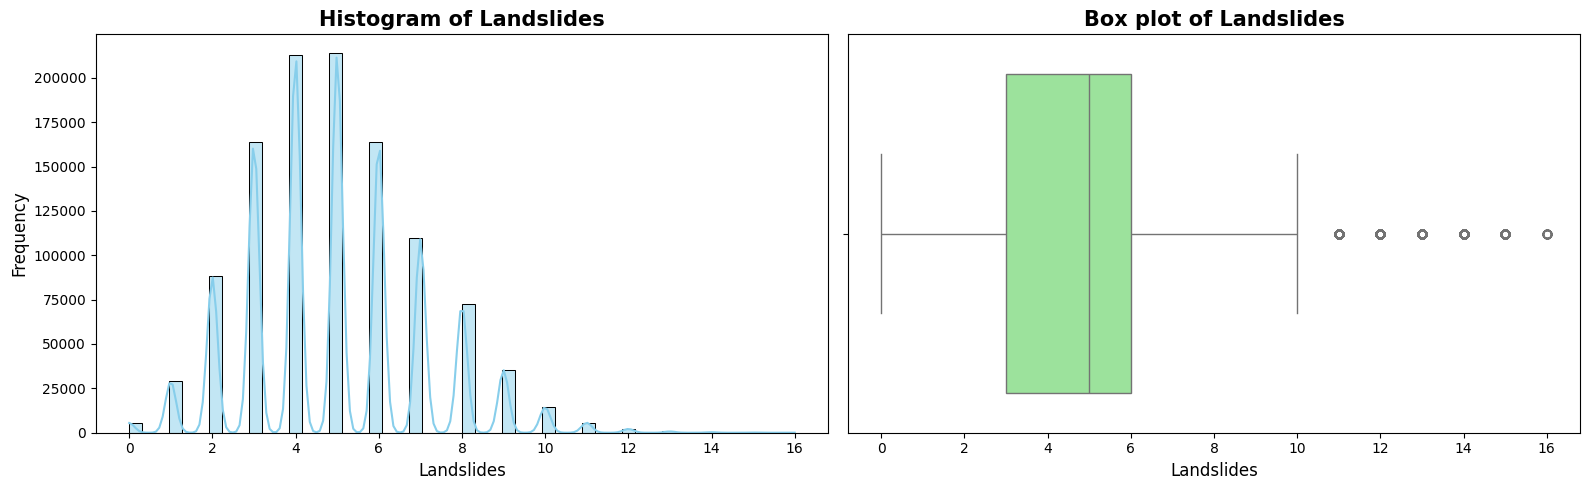

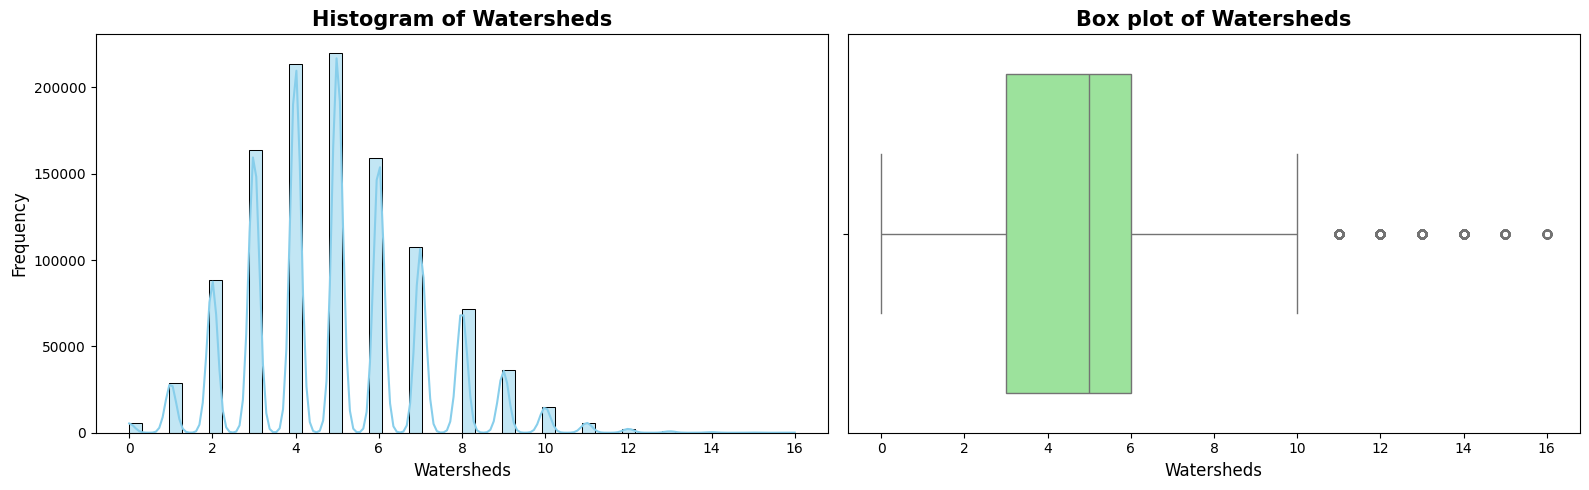

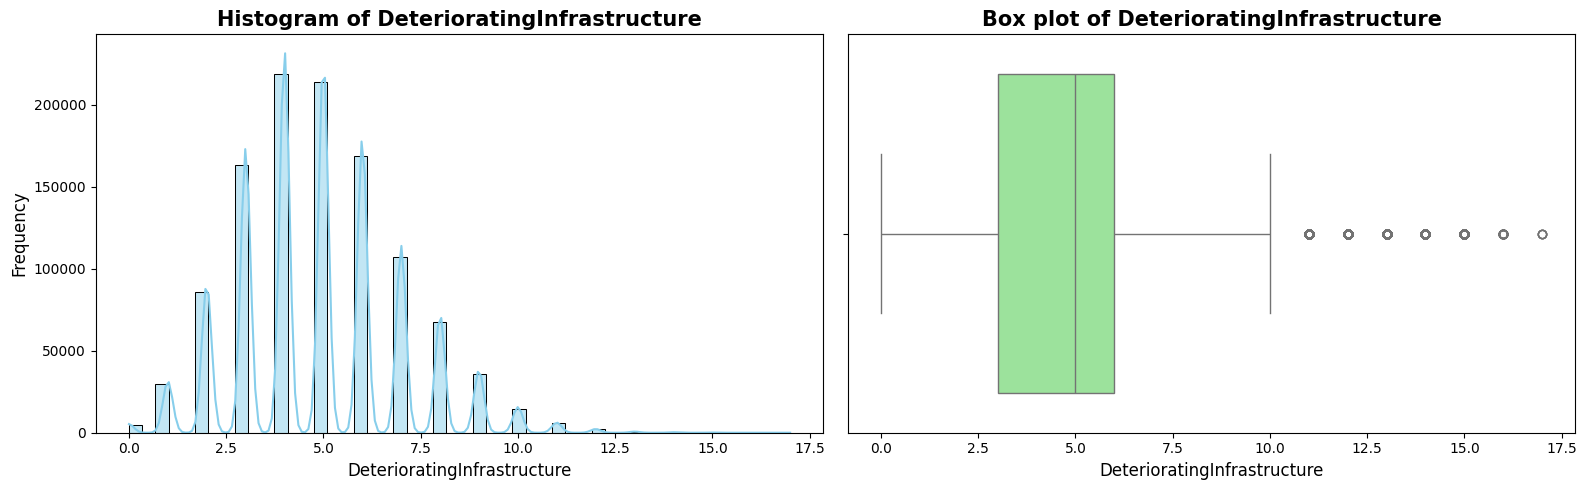

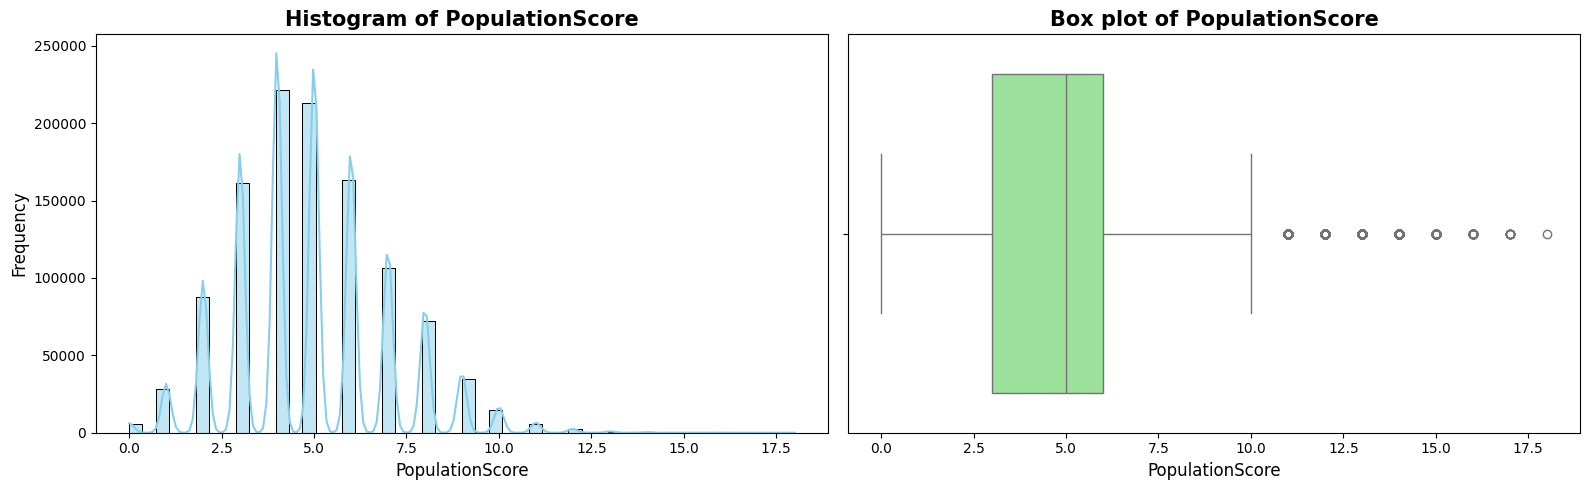

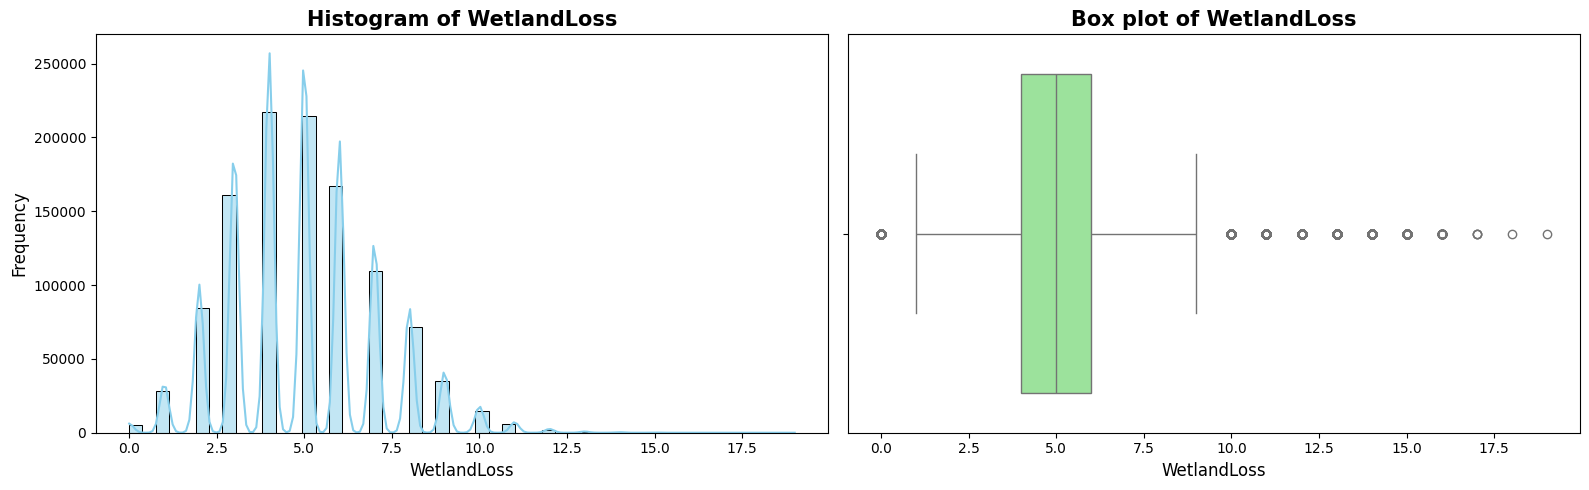

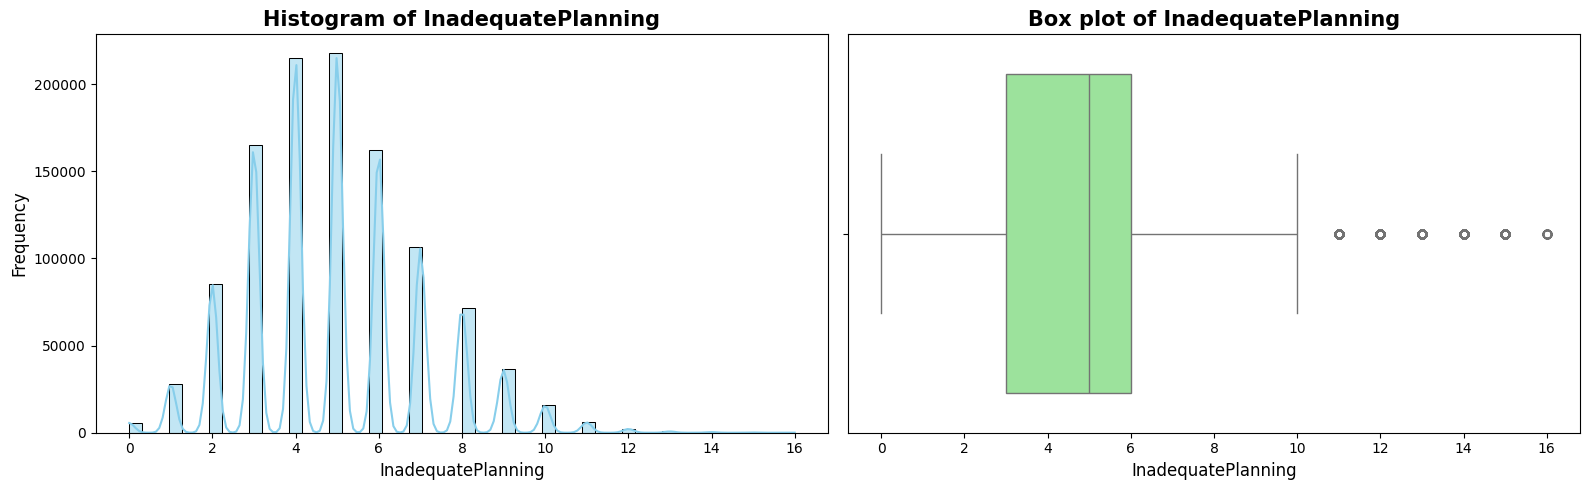

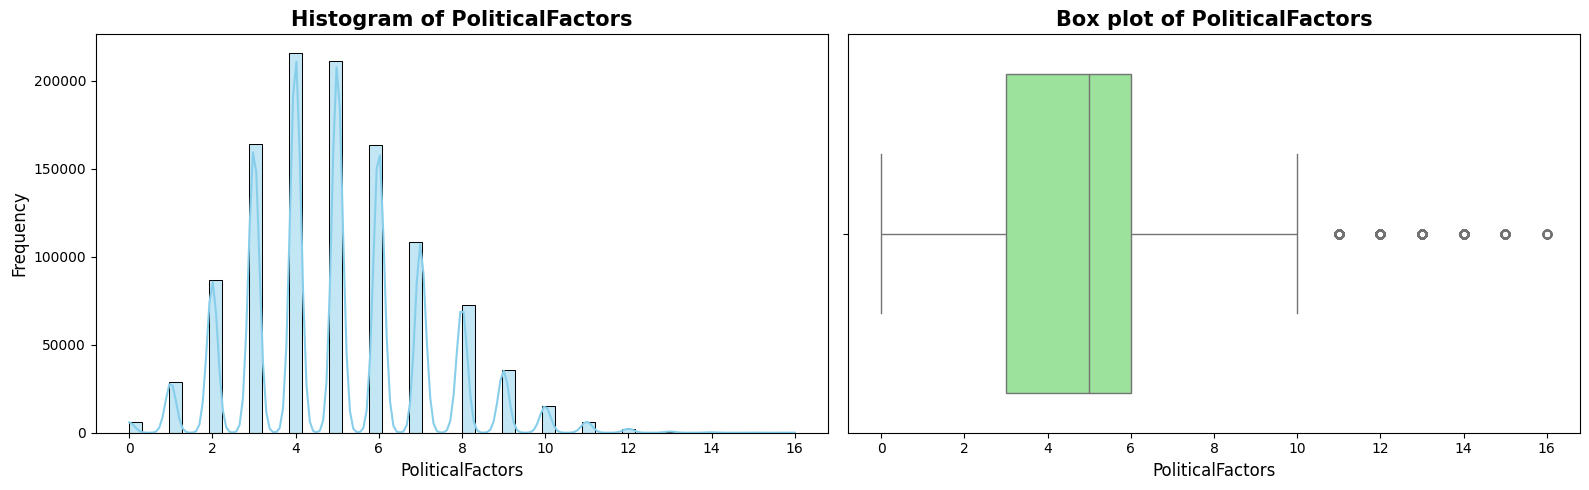

In [9]:
plot_numerics(df_train[num_cols])

### Correlation

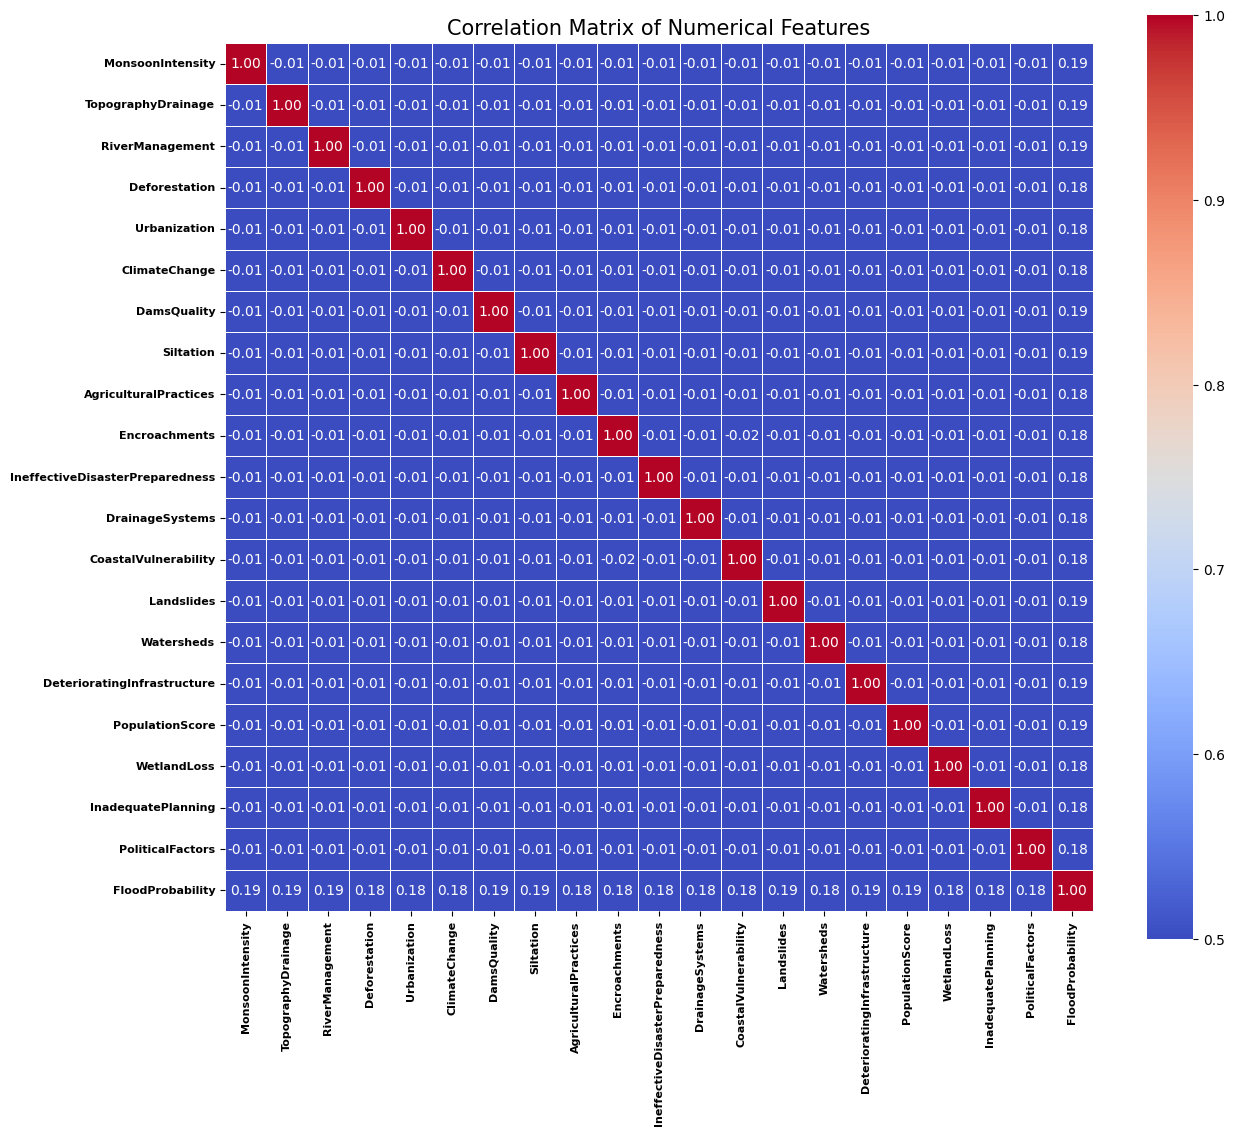

In [10]:
corr_matrix = df_train[num_cols+['FloodProbability']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75,annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold')
plt.show()

### Feature Engineering

In [11]:
unique_vals = []
for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())

unique_vals = list(set(unique_vals))
#
def getFeats(df):
    
    scaler = StandardScaler()
    
    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity'] + df['ClimateChange']) * (df['Deforestation'] + df['Urbanization'] + df['AgriculturalPractices'] + df['Encroachments'])
    df['InfrastructurePreventionInteraction'] = (df['DamsQuality'] + df['DrainageSystems'] + df['DeterioratingInfrastructure']) * (df['RiverManagement'] + df['IneffectiveDisasterPreparedness'] + df['InadequatePlanning'])
    
    df['sum'] = df[num_cols].sum(axis=1)
    df['std']  = df[num_cols].std(axis=1)
    df['mean'] = df[num_cols].mean(axis=1)
    df['max']  = df[num_cols].max(axis=1)
    df['min']  = df[num_cols].min(axis=1)
    df['mode'] = df[num_cols].mode(axis=1)[0]
    df['median'] = df[num_cols].median(axis=1)
    df['skew'] = df[num_cols].skew(axis=1)
    df['kurt'] = df[num_cols].kurt(axis=1)

    for i in range(10,100,10):
        df[f'{i}th'] = df[num_cols].quantile(i/100, axis=1)
        
    df['harmonic'] = len(num_cols) / df[num_cols].apply(lambda x: (1/x).mean(), axis=1)
    df['geometric'] = df[num_cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    df['zscore'] = df[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
    df['cv'] = df['std'] / df['mean']
    df['Skewness_75'] = (df[num_cols].quantile(0.75, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['Skewness_25'] = (df[num_cols].quantile(0.25, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['2ndMoment'] = df[num_cols].apply(lambda x: (x**2).mean(), axis=1)
    df['3rdMoment'] = df[num_cols].apply(lambda x: (x**3).mean(), axis=1)
    df['entropy'] = df[num_cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)
    
    for v in unique_vals:
        if v<16:
            df['cnt_{}'.format(v)] = (df[num_cols] == v).sum(axis=1)
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

In [12]:
df_train['typ']=0
df_test['typ']=1
#
df_all=pd.concat([df_train,df_test],axis=0)
df_all=getFeats(df_all)
df_all.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,cnt_6,cnt_7,cnt_8,cnt_9,cnt_10,cnt_11,cnt_12,cnt_13,cnt_14,cnt_15
0,0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,...,1,2,2,0,0,0,0,0,0,0
1,1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,...,2,2,2,1,0,0,0,0,0,0
2,2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,...,4,4,1,0,0,0,0,0,0,0
3,3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,...,3,3,2,0,0,0,0,0,0,0
4,4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,...,3,0,0,0,0,0,0,0,0,0


In [13]:
df_train=df_all[df_all['typ']==0]
df_test=df_all[df_all['typ']==1]
#
X=df_train.drop(['id','FloodProbability','typ'],axis=1)
y=df_train['FloodProbability']
#
feats=list(X.columns)

### Feature Importance

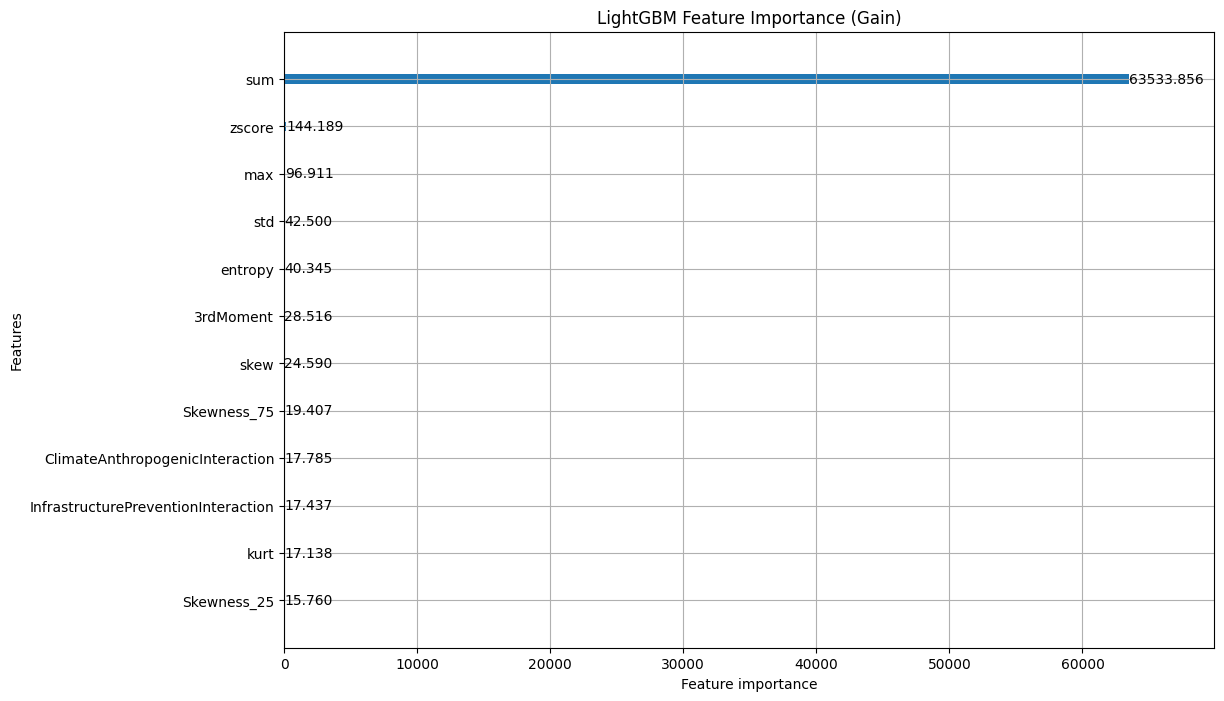

In [14]:
params={'verbosity':-1,'n_estimators': 550, 'learning_rate': 0.02, 'num_leaves':250,'max_depth':10}
LGB=lgb.LGBMRegressor(**params)
LGB.fit(X,y)
#
lgb.plot_importance(LGB, importance_type="gain", figsize=(12,8), max_num_features=12,
                    title="LightGBM Feature Importance (Gain)")
plt.show()

### Training CV

In [16]:
## Function for Cross Validation
def cross_val_train(X,y,df_test,params):
    
    spl=5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores, train_scores = [],[]
    
    cv = KFold(spl, shuffle=True, random_state=42)
    
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X,y)):
        
        X_train = X.iloc[train_ind]
        y_train = y[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y[valid_ind]
        
        model = lgb.LGBMRegressor(boosting_type = 'gbdt', 
                                   n_estimators=2000, 
                                   learning_rate =  0.012, 
                                   device='gpu',
                                   num_leaves = 250, 
                                   subsample_for_bin= 165700, 
                                   min_child_samples= 114, 
                                   reg_alpha= 2.075e-06, 
                                   reg_lambda= 3.839e-07, 
                                   colsample_bytree= 0.9634,
                                   subsample= 0.9592, 
                                   max_depth= 10,
                                   random_state=0,
                                  verbosity=-1
                                 )
        model.fit(X_train, y_train,
                    eval_set=[(X_val, y_val)],
                    callbacks=[lgb.early_stopping(stopping_rounds=70), lgb.log_evaluation(100)]) 
        
        y_pred_trn=model.predict(X_train)
        y_pred_val=model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print("Fold:",fold, " Train R2:",np.round(train_r2,5), " Val R2:",np.round(val_r2,5))
        
        test_preds += model.predict(df_test[feats])/spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-"*50)
        
    return val_scores, val_preds, test_preds

In [17]:
val_scores, val_preds, test_preds=cross_val_train(X,y,df_test,params)

Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000542144
[200]	valid_0's l2: 0.00035828
[300]	valid_0's l2: 0.000341754
[400]	valid_0's l2: 0.000340245
[500]	valid_0's l2: 0.000340107
Early stopping, best iteration is:
[490]	valid_0's l2: 0.000340101
Fold: 0  Train R2: 0.87255  Val R2: 0.86916
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.000543965
[200]	valid_0's l2: 0.000358576
[300]	valid_0's l2: 0.000341685
[400]	valid_0's l2: 0.000339996
[500]	valid_0's l2: 0.000339832
[600]	valid_0's l2: 0.000339816
Early stopping, best iteration is:
[584]	valid_0's l2: 0.000339815
Fold: 1  Train R2: 0.87297  Val R2: 0.86971
--------------------------------------------------
Training until validation scores don't improve for 70 rounds
[100]	valid_0's l2: 0.00054476
[200]	valid_0's l2: 0.00035978
[300]	valid_0's l2: 0.000342994
[400]	valid_0's l2: 0.000341364
[500]	valid_0's 

In [ ]:
# Evaluate the model
mse = mean_squared_error(y,val_preds)
rmse = np.sqrt(mean_squared_error(y, val_preds))
r2 = r2_score(y, val_preds)
#
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

### Plot Residuals

In [ ]:
plt.figure(figsize=(12,6))
# Calculate residuals
residuals = y - val_preds
# Plot residuals
plt.scatter(val_preds, residuals)
plt.axhline(y=0, color='red', linestyle='--',linewidth=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Plot histogram of residuals
plt.figure(figsize=(12,6))
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Submission

In [ ]:
sub=sample_sub[['id']]
sub['FloodProbability'] = test_preds
sub.to_csv('submission.csv', index=False)
sub.head()